---
---

# **1 - Support Vector Machines**

In an N-dimensional space, a hyperplane is a flat affine subspace of hyperplane dimension N-1. For example:
  * 1-D Hyperlane is a single point

  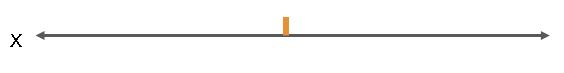
  * 2-D Hyperplane is a line

  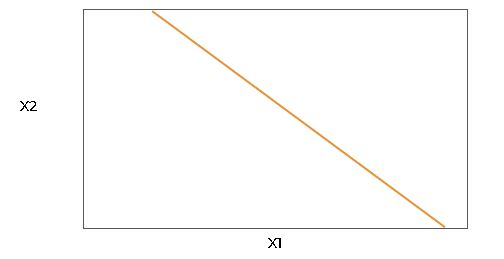
  * 3-D Hyperplane is a flat plane

  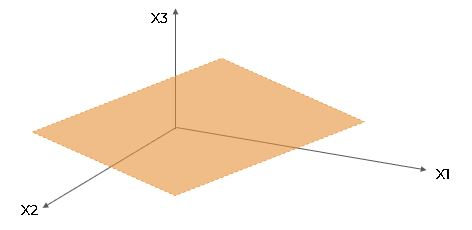

The main idea behind SVM is that we can use Hyperplanes to create **separation** between classes. Then new points will fall on **one side** of this **separating** hyperplane, which we can then use to assign a class.

---
**Idea behind SVM**

Idea behind SVM is to create a **separating hyperplane** between the classes.

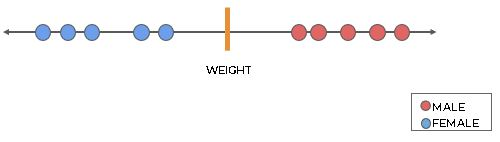

A new point would be classified based on what side of the point they land on.

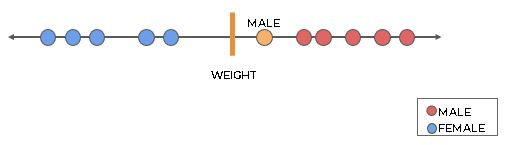

How do we choose where to put this separating hyperplane?. There are many options that perfectly separate out these classes:

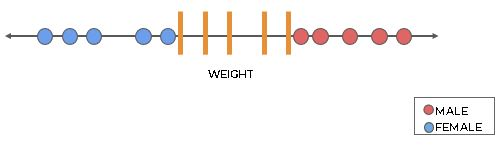

We could use the separator that **maximizes** the **margins** between the classes.

This is known as a **Maximal Margin Classifier**. This same idea of maximum margins applies to N-dimensions.

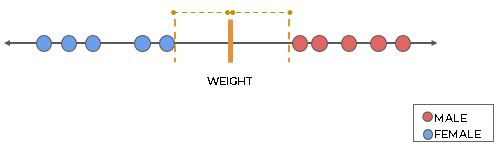



Imagine a 2 dimensional feature space, separated by 2-D hyperplane or a line:

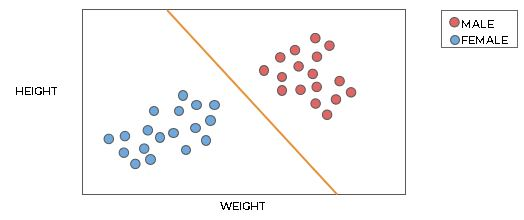

Multiple possible hyperplanes:

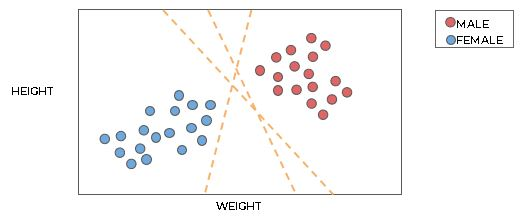

Choose to maximize margins.

Data points at margin 'support' separator, each data point is a 2D vector.

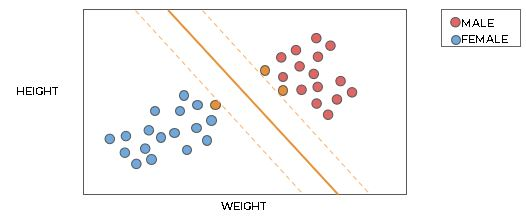

---
**Classes Not Perfectly Separable**

What happens if classes are not perfectly separable?

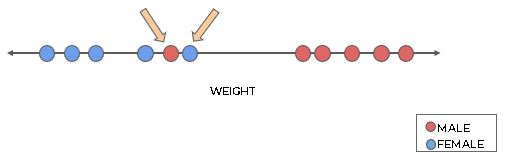



This fit only misclassified one female training point as male. This looks like a high variance fit (overfitting) to training data, picking to much noise from female:

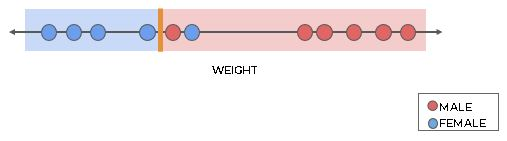

We are not be able to separate without allowing for misclassifications. We will have a bias-variance trade off depending where we place this separator. 

We can **increase** the **bias** by little bit to **reduce** the **variance**. Here we allow more bias to lead to better long term results on future data.

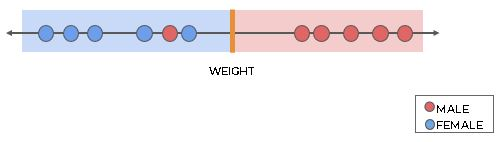

Distance between threshold and the observations is a **soft margin**. 

Soft margin allows for misclassification inside the margins.

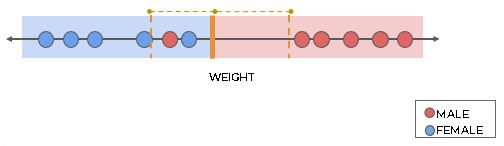

We can use cross validation to determine the optimal size of the margins

---
**Maximal Margin Classifier vs Support Vector Classifier (Soft Margin)**

* Maximal Margin Classifier:

  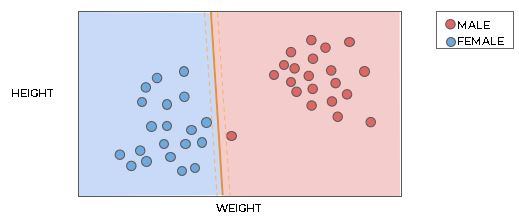

* Soft Margin:

  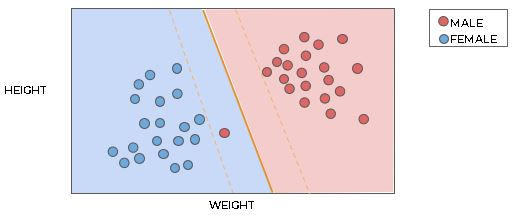

  Allowing misclassification to add more bias to reduce variance (avoid overfitting).

---
**What would happen in a case where a hyperplane performs poorly, even when allowing for misclassification ?**

Notice a single hyperplane wont separate out the classes without many missclassifications :

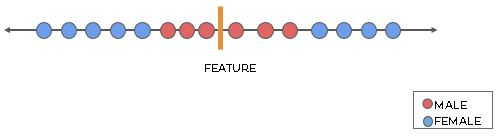

Cant split classes with hyperplane line :

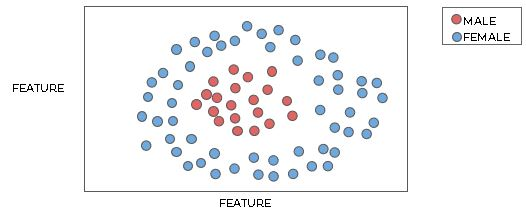

To solve these cases, we move on from **Support Vector Classifier**, to **Support Vector Machines (SVM)**.

SVM use **kernels** to project the data to a **higher dimension**, in order to use a **hyperplane** in this higher dimension to **separate** the data 

---
**SVM Kernels**

Kernels allow us to move beyond Support Vector Classifier and use Support Vector Machines. Recall our 1D example of classes not easily separated by a single hyperplane:

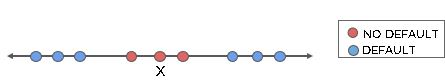

Lets explore how using a kernel could project this feature onto another dimension, for example, a polynomial kernel could expand onto an $X^2$ dimension, create a hyperplane after this projection:

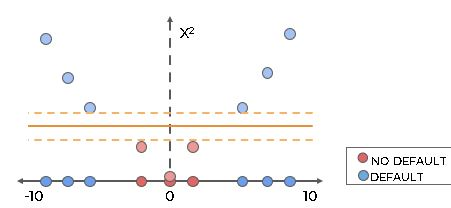

Use kernel projection to evaluate new points:

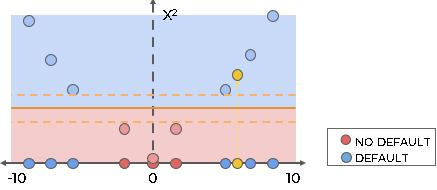

Imagine a 2D feature space where a hyperplane can not separate effectively, even with soft margins:

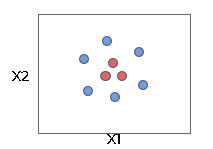



We use **Support Vector Machines** to enable the use of a kernel transformation to project to a higher dimension (2D to 3D):

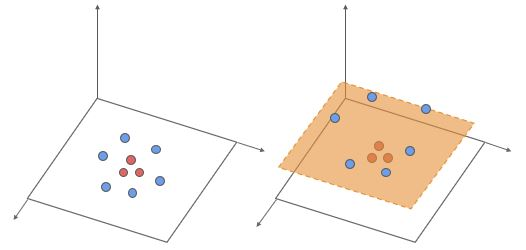

You may have heard of the use of kernels in SVM as the 'kernel trick'. We previusly visualized transforming data points from one dimension into a higher dimension. Mathematically, the kernel trick actually avoids recomputing the points in a higher dimensional space.

---
**Hyperplanes defined:**

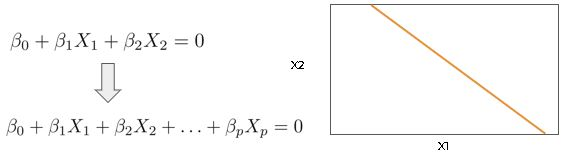

---
**Separating hyperplanes:**

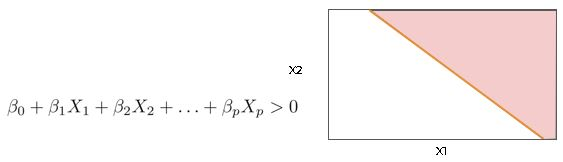

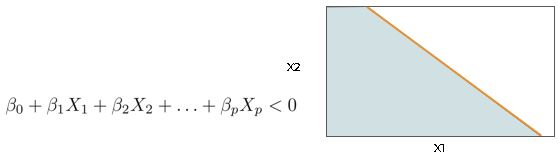


---
**Data points:**

* one through n represents the number of data points
* one through p represents the number of features

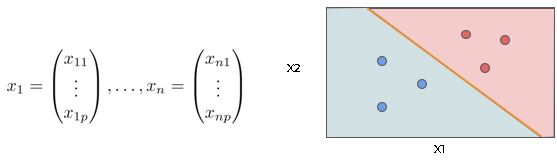

---
**1. Maximal Margin Classifier**

Recall that the whole purpose of a max margin classifier is to maximize M, where M is this margin extending from the hyperplanes. So we are essentially trying to choose the best beta coefficients that can maximize this margin.

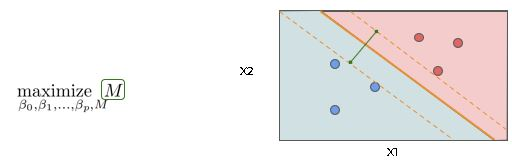

We must fulfill this subject requirement:

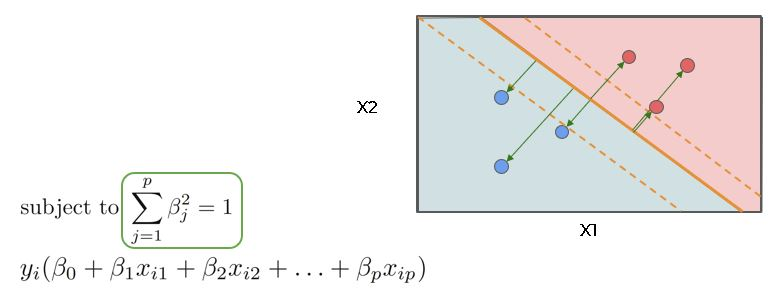

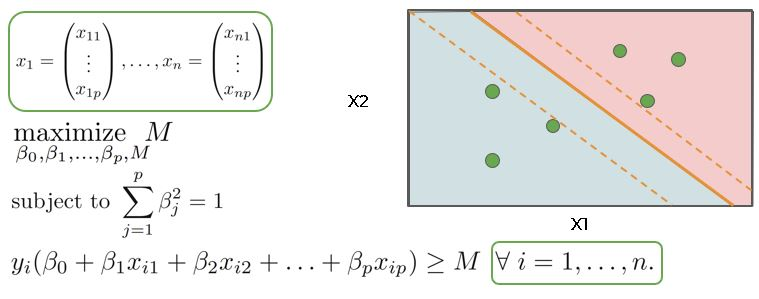

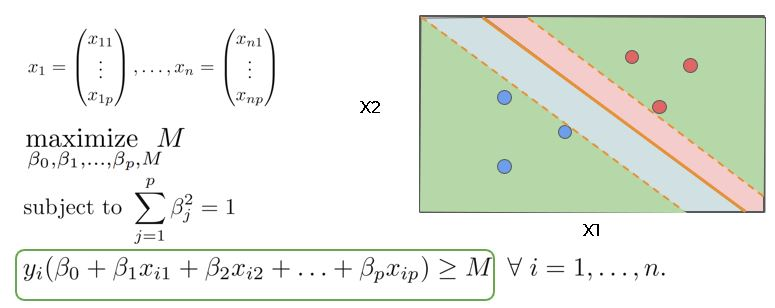

No data points within the margin (M).

---
**2. Support Vector Classifier (Soft Margin)**

Allowing for some number of points to fall within a margin based on **error factor** (epsilon factor) and **number of miss-classification** (C) that can be allowed that provided by the user:

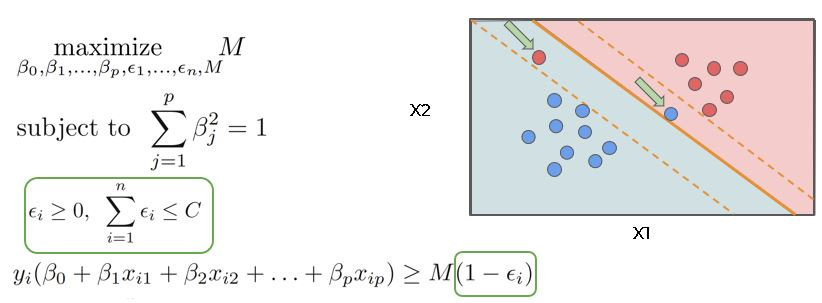

**NOTE: In Scikit-Learn, C is inverse of Regularization (quite different from the Equation), so smaller C stronger Regularization (High miss-classification/High Bias)**

---
**3. Support Vector Machines**

Support Vector Machines enable the use of a kernel transformation to project to a higher dimension.

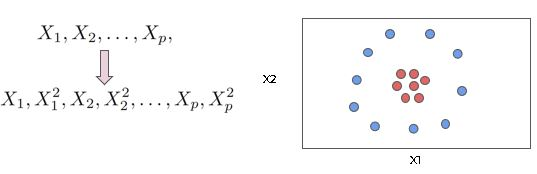

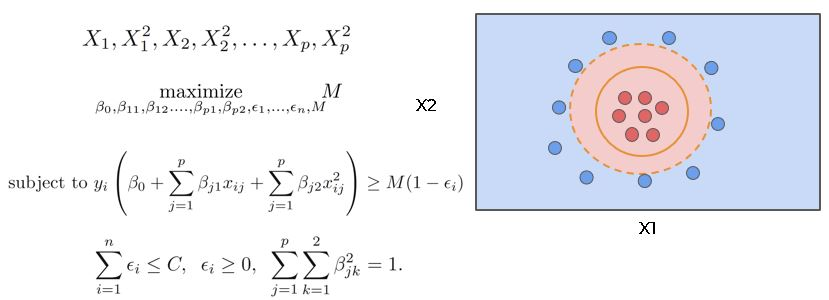

**NOTE: In Scikit-Learn, C is inverse of Regularization (quite different from the Equation), so smaller C stronger Regularization (High miss-classification/High Bias)**

How to deal with very large feature space? as polynomial order grows larget, the number of computations necessary to solve for margins also grows. The answer lies in the **kernel trick** which makes use of the **inner product** of vectors, also known as the **dot product**.

---
**Dot Product**

Notice how the dot product can be thought of as a similarity between the vectors.

* cos($0^o$) = 1
* cos($90^o$) = 0
* cos($180^o$) = -1

This is like i.i = 1, i.j = 0 and i.k = 0

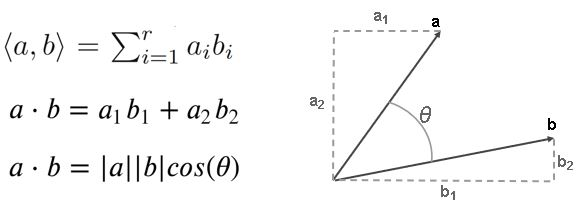



---
**Linear Support Vector Classifier** rewritten: 

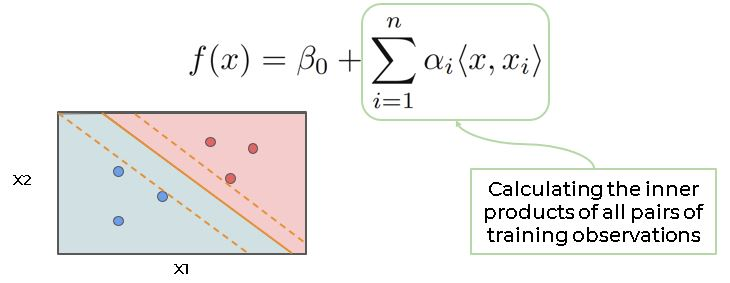

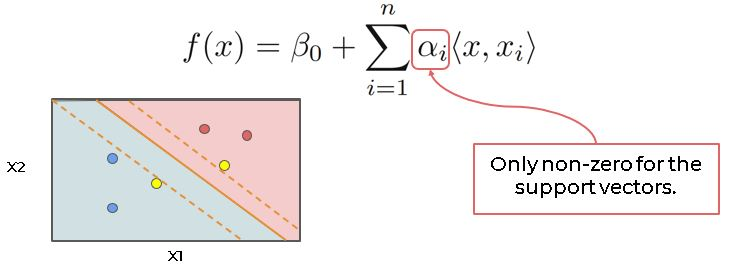

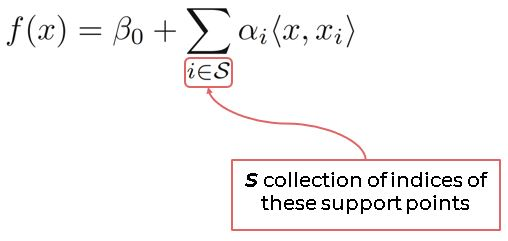

---
**1. Kernel Function**

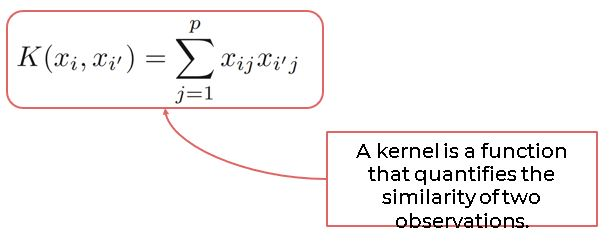

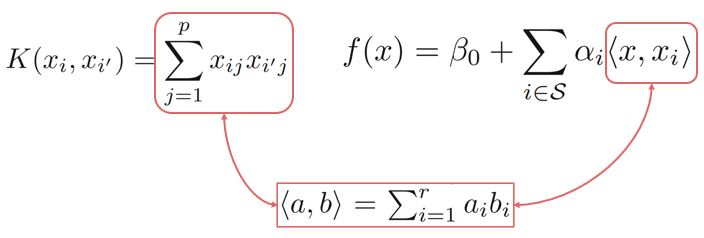

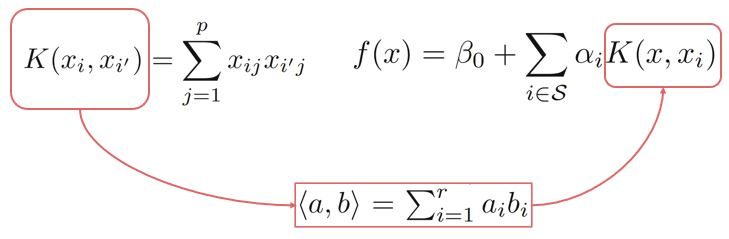

---
**2. Polynomial Kernel**

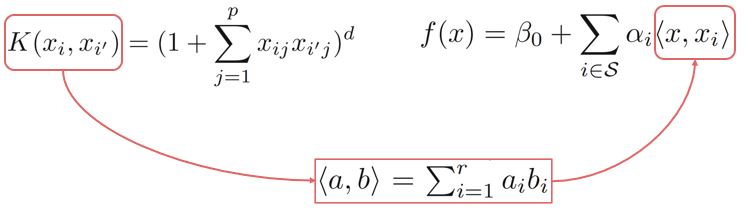

---
**3. Radial Basis Kernel**

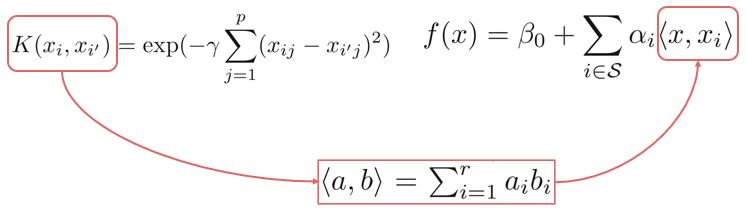

The use of **kernels** as a replacement is known as the **kernel trick**. Kernels allow us to avoid computations in the enlarged feature space, by only needing to perform computations for each distinct pair of training points.

Intuitively we've already seen inner products act as a measurement of similarity between vectors. The use of kernels can be thought of as a measure of similariy between the original feature space and the enlarged feature space.

---
---

# **2 - SVM-Classification**

## **A. Data Set**

**NOTE: For this example, we will explore the algorithm, so we'll skip scaling and also skip a train\test split and instead see how the various parameters can change an SVM (easiest to visualize the effects in classification)**

[Link to a great Paper on SVM](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=4448154647BC7B10C991CEF2236BBA38?doi=10.1.1.114.4288&rep=rep1&type=pdf)
* A tutorial on support vector regression by ALEX J. SMOLA and BERNHARD SCHOLKOPF

## Data

The data shown here simulates a medical study in which mice infected with a virus were given various doses of two medicines and then checked 2 weeks later to see if they were still infected. Given this data, our goal is to create a classifcation model than predict (given two dosage measurements) if they mouse will still be infected with the virus.

You will notice the groups are very separable, this is on purpose, to explore how the various parameters of an SVM model behave.

## SVM - Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Data_Science/Materi/Notes/10_Support_Vector_Machines/mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

In [5]:
df.isnull().sum()

Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64

In [6]:
df.shape

(400, 3)

---

## **B. Exploratory Data Analysis and Visualization**

### a. Features Correlation

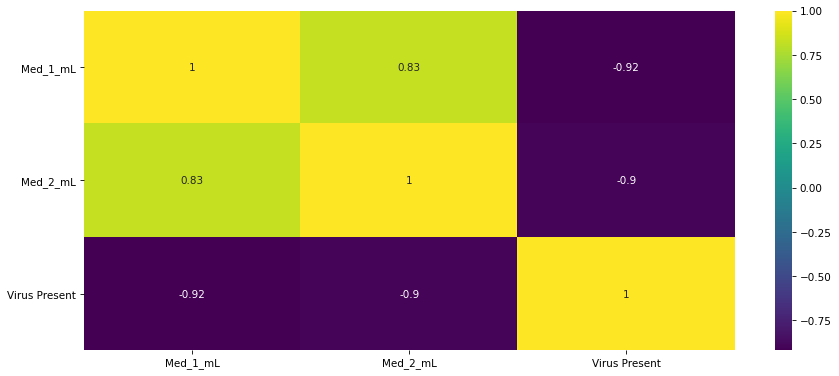

In [7]:
plt.figure(figsize=(14,6),dpi=75)
sns.heatmap(df.corr().round(2), annot=True, cmap='viridis')
plt.yticks(rotation=0)
plt.show()

In [8]:
df.corr()['Virus Present'].sort_values()

Med_1_mL        -0.922304
Med_2_mL        -0.903718
Virus Present    1.000000
Name: Virus Present, dtype: float64

---

### b. Label Count

In [9]:
df['Virus Present'].value_counts()

1    200
0    200
Name: Virus Present, dtype: int64

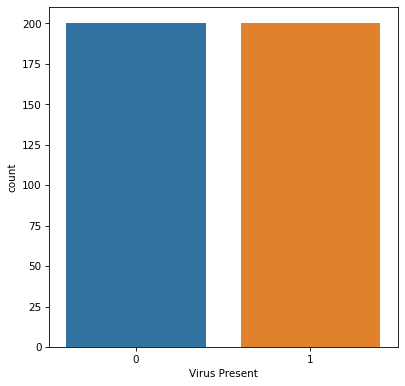

In [10]:
plt.figure(figsize=(6,6),dpi=75)
sns.countplot(data=df,x='Virus Present')
plt.show()

---

### **c. Separating Hyperplane**

Our goal with SVM is to create the best separating hyperplane. In 2 dimensions, this is simply a line.

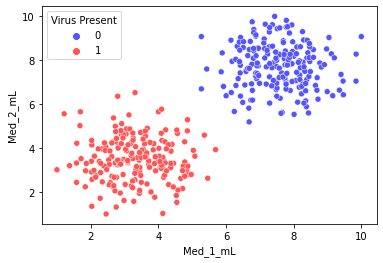

In [11]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present',
                data=df, palette='seismic');

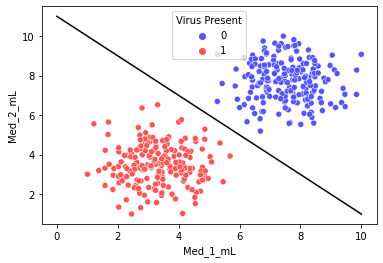

In [12]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',palette='seismic',data=df)

# We want to somehow automatically create a separating hyperplane ( a line in 2D)

x = np.linspace(0,10,100)
m = -1 # slope/gradient
b = 11 # intercept, as x=0 then y=11
y = m*x + b # regression line
#x=[0,10]
#y=[11,1]
plt.plot(x,y,'k');

The class will be separated easily


---

## **C. SVM Classification Model (SVC)**

**NOTE: For this example, we will explore the algorithm, so we'll skip any scaling or even a train\test split for now**

In [13]:
from sklearn.svm import SVC # Supprt Vector Classifier

In [14]:
#help(SVC)

In [15]:
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

---

### **a. Plot SVM Boundaries**

### C

Regularization parameter. The strength of the regularization is **inversely** proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

*Note: If you are following along with the equations, specifically the value of C as described in ISLR, C in scikit-learn is **inversely** proportional to this value.*

### Kernel

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

In [16]:
'''
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()
'''

"\nimport numpy as np\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\ndef plot_svm_boundary(model,X,y):\n    \n    X = X.values\n    y = y.values\n    \n    # Scatter Plot\n    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')\n\n    \n    # plot the decision function\n    ax = plt.gca()\n    xlim = ax.get_xlim()\n    ylim = ax.get_ylim()\n\n    # create grid to evaluate model\n    xx = np.linspace(xlim[0], xlim[1], 30)\n    yy = np.linspace(ylim[0], ylim[1], 30)\n    YY, XX = np.meshgrid(yy, xx)\n    xy = np.vstack([XX.ravel(), YY.ravel()]).T\n    Z = model.decision_function(xy).reshape(XX.shape)\n\n    # plot decision boundary and margins\n    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,\n               linestyles=['--', '-', '--'])\n    # plot support vectors\n    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,\n               linewidth=1, facecolors='none', edgecolors='k')\n    plt.show()\n"

In [17]:
#perform authentication to google drive using this code.
#from google.colab import drive
#drive.mount('/content/drive')

# access .py directory
import sys
sys.path.append('/content/drive/MyDrive/Data_Science/Materi/Notes/10_Support_Vector_Machines/')

In [18]:
# This is imported from the supplemental .py file
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from svm_margin_plot import plot_svm_boundary

---

#### **Linear**

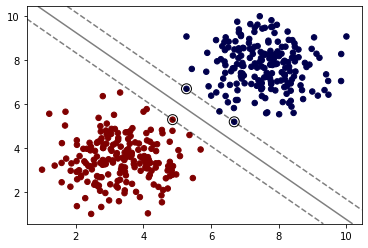

In [19]:
 # In scikit-learn, higher C mean weaker Regularization (doesnt allow point within margins)
model = SVC(kernel='linear', C=1000)
model.fit(X, y)
plot_svm_boundary(model,X,y);

3 data points is hit the support vector

**Stronger Regularization / Lower C (in scikit-learn):**

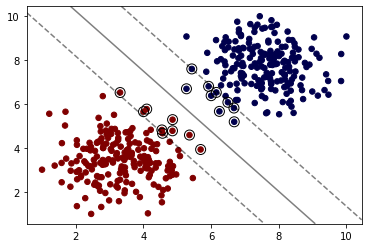

In [20]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)
plot_svm_boundary(model,X,y);

---

#### **Radial Basis Function (RBF)**

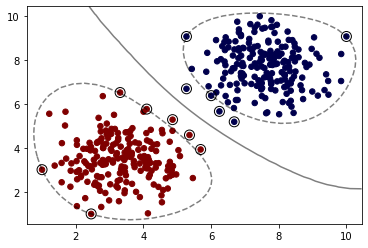

In [21]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model,X,y);

it is transformed to higher dimension then project it back down to 2D

##### **gamma**

    gamma : {'scale', 'auto'} or float, default='scale'.
            Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if gamma='scale' (default) is passed then it uses 
      1 / (n_features * X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features.

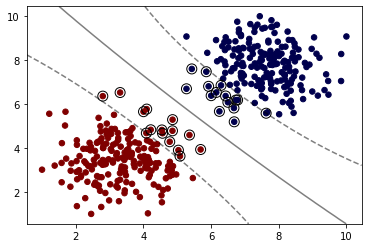

In [22]:
model = SVC(kernel='rbf', C=1, gamma=0.01)
model.fit(X, y)
plot_svm_boundary(model,X,y);

---

#### **Sigmoid**

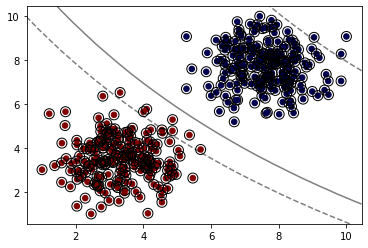

In [23]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y);

---

#### **Degree (poly kernels only)**

Degree of the polynomial kernel function ('poly').
Ignored by all other kernels.

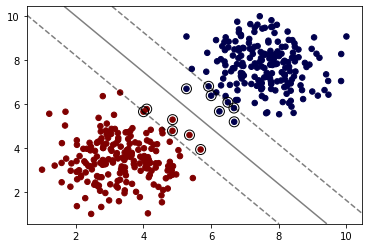

In [24]:
model = SVC(kernel='poly', C=1, degree=1)
model.fit(X, y)
plot_svm_boundary(model,X,y);

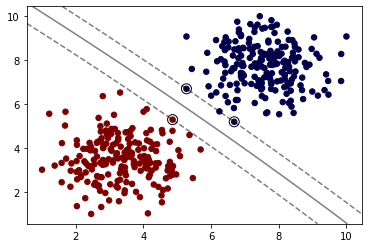

In [25]:
model = SVC(kernel='poly', C=1, degree=2)
model.fit(X, y)
plot_svm_boundary(model,X,y);

---

### **b. Setup**

#### **Train | Test Split**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [28]:
X_train.shape

(340, 2)

In [29]:
X_test.shape

(60, 2)

---

#### **Scaling the Data**

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
# Fit (Calculate Statistical Information)and Transform train data
scaled_X_train = scaler.fit_transform(X_train)

In [33]:
scaled_X_test = scaler.transform(X_test)

---

### **c. Create Estimator/Model**

In [34]:
from sklearn.svm import SVC # Supprt Vector Classifier

In [35]:
svm = SVC()

---

#### **Grid Search for Best Hyper-Parameters**

Keep in mind, for this simple example, we saw the classes were easily separated, which means each variation of model could easily get 100% accuracy, meaning a grid search is "useless".

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {'C':[0.01, 0.1, 1, 5, 10], 
              'kernel':['linear','rbf'],
              'gamma':['scale','auto']}

In [38]:
grid_svm_model = GridSearchCV(svm,
                              param_grid,
                              cv=5)

---

#### **Fit/Train Model**

In [39]:
grid_svm_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 5, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

---

#### **Coefficients/Parameters**

In [40]:
# 100% accuracy (as expected)
grid_svm_model.best_score_

1.0

In [41]:
grid_svm_model.best_params_

{'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

### **c. Performance Evaluation**



#### **Classification Metrics on Test Set**

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

In [43]:
y_pred = grid_svm_model.predict(scaled_X_test)

In [44]:
accuracy_score(y_test, y_pred)

1.0

In [45]:
confusion_matrix(y_test, y_pred)

array([[32,  0],
       [ 0, 28]])

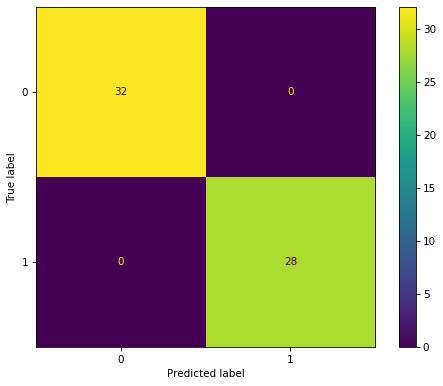

In [46]:
fig, ax = plt.subplots(figsize=(8,6), dpi=75)
plot_confusion_matrix(grid_svm_model, scaled_X_test, y_test, ax=ax, values_format='d')
plt.show()

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



**Precision: Ukuran seberapa banyak prediksi yang tepat**

**Recall: Ukuran seberapa banyak Nilai Aktual yang diprediksi dengan tepat**

---

#### **Performance Curves**

**Create both the precision recall curve and the ROC Curve.**

When to Use ROC vs. Precision-Recall Curves?

Generally, the use of ROC curves and precision-recall curves are as follows:

    ROC curves should be used when there are roughly equal numbers of observations for each class.
    Precision-Recall curves should be used when there is a moderate to large class imbalance.


In [48]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

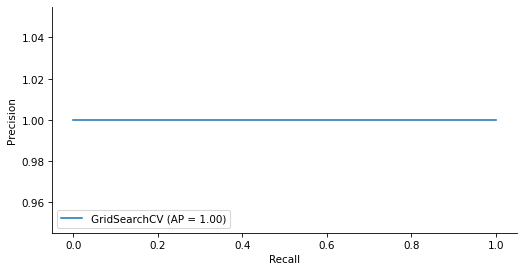

In [49]:
fig, ax = plt.subplots(figsize=(8,4), dpi=75)
plot_precision_recall_curve(grid_svm_model, scaled_X_test, y_test, ax=ax)
sns.despine(); # Remove border from graph

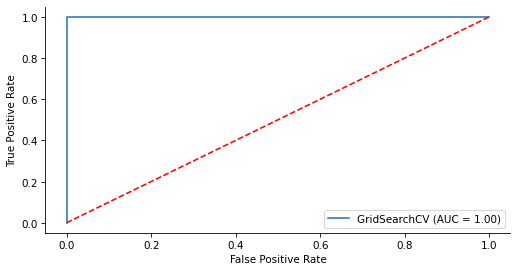

In [50]:
# Receiver Operating Characteristic
fig, ax = plt.subplots(figsize=(8,4), dpi=75)
plot_roc_curve(grid_svm_model, scaled_X_test, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--')
sns.despine();

    Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
    Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

---

#### Plot SVM Boundary on Best Parameter

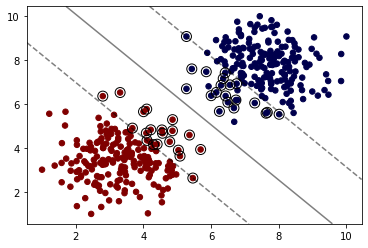

In [51]:
best_svm = SVC(C=0.01, gamma='scale', kernel= 'linear')
best_svm.fit(X_train, y_train)
plot_svm_boundary(best_svm, X, y)

---

## **D. Finalize Model**

### **a. Creating pipeline and Re-Train/Fit Model on All Data**

**NOTE: If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model).**

In [52]:
from sklearn.pipeline import Pipeline

In [53]:
scaler = StandardScaler()

svm_final = SVC(C=0.01, gamma='scale', kernel= 'linear')
operations = [('scaler', scaler),
              ('svm_final', svm_final)]

In [54]:
final_model_pipe = Pipeline(operations)

In [55]:
final_model_pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_final',
                 SVC(C=0.01, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='linear', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [56]:
final_model_pipe.classes_

array([0, 1])

---

### **b. Saving the Model**

In [57]:
from joblib import dump

In [58]:
dump(final_model_pipe, '/content/drive/MyDrive/Data_Science/Materi/Notes/10_Support_Vector_Machines/virus_presence_classification_svm_pipeline.joblib')

['/content/drive/MyDrive/Data_Science/Materi/Notes/10_Support_Vector_Machines/virus_presence_classification_svm_pipeline.joblib']

---
---

# **3 - SVM-Regression**

## A. Data Set

concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

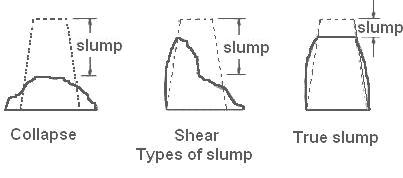

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Materi/Notes/10_Support_Vector_Machines/cement_slump.csv')

In [61]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [62]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [63]:
df.isnull().sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

In [64]:
df.shape

(103, 10)

---

## **B. Exploratory Data Analysis**

### **a. Label Distribution**

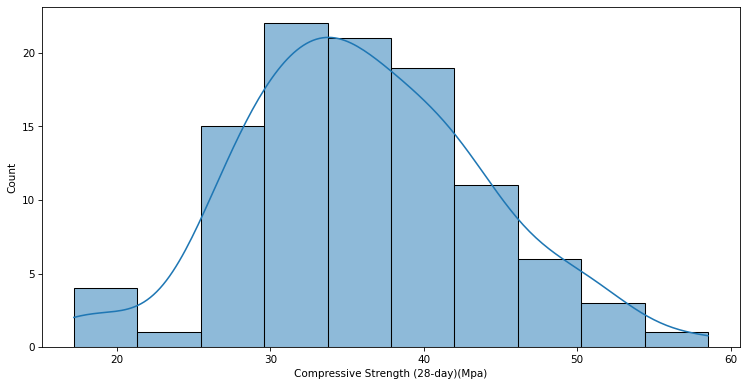

In [65]:
# Plot the distribution of 'SalePrice'
plt.figure(figsize=(12,6), dpi=75)
sns.histplot(df['Compressive Strength (28-day)(Mpa)'], kde=True);

---

### **b. Features Correlation**

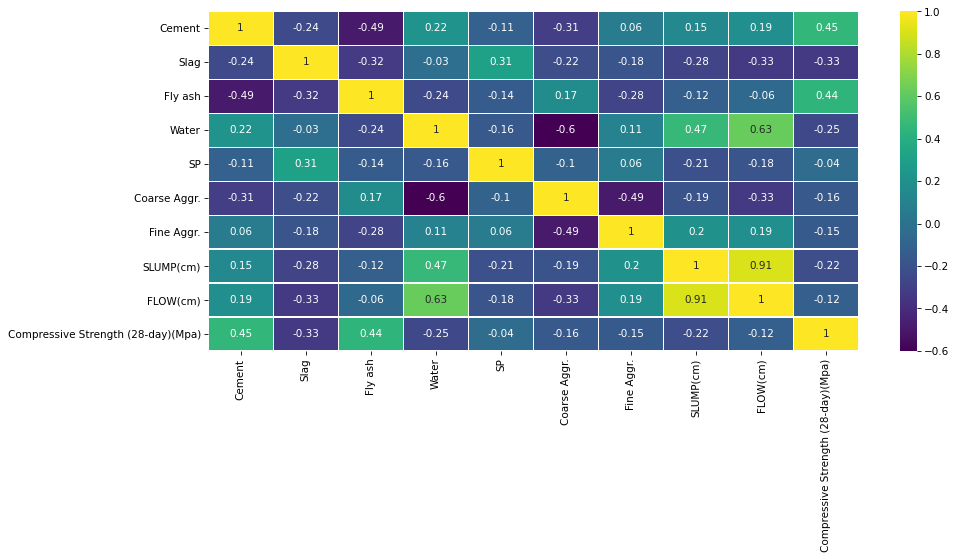

In [66]:
plt.figure(figsize=(14,6),dpi=75)
sns.heatmap(df.corr().round(2), annot=True, cmap='viridis', lw=0.1);

Cement and Fly ash has better impact in concrete strength

In [67]:
df.corr()['Compressive Strength (28-day)(Mpa)'].sort_values()

Slag                                 -0.331522
Water                                -0.254320
SLUMP(cm)                            -0.223499
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
FLOW(cm)                             -0.124189
SP                                   -0.037909
Fly ash                               0.444380
Cement                                0.445656
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

---

### c. Features vs Label

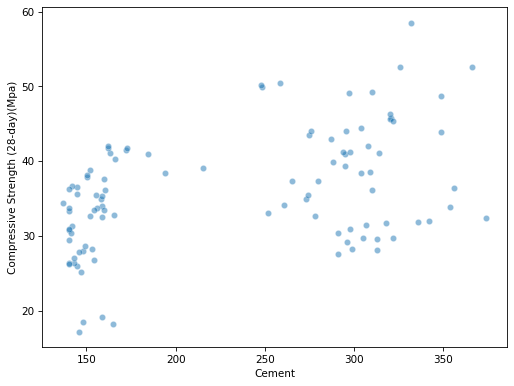

In [68]:
plt.figure(figsize=(8,6), dpi=75)
sns.scatterplot(x='Cement', y='Compressive Strength (28-day)(Mpa)', data=df, alpha=0.5);

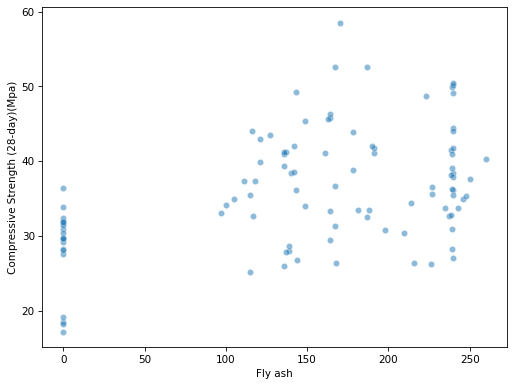

In [69]:
plt.figure(figsize=(8,6), dpi=75)
sns.scatterplot(x='Fly ash', y='Compressive Strength (28-day)(Mpa)', data=df, alpha=0.5);

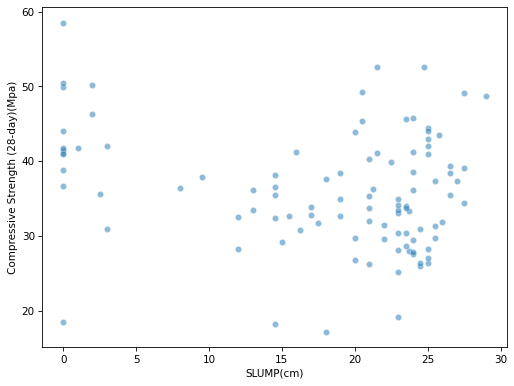

In [70]:
plt.figure(figsize=(8,6), dpi=75)
sns.scatterplot(x='SLUMP(cm)', y='Compressive Strength (28-day)(Mpa)', data=df, alpha=0.5);

Higher slump in concrete, tends to lower the strength of concrete after 28th days

---

## **C. SVM Regression Model**

### **a. Setup**

#### **Train | Test Split**

Alternatively you could also set this up as a pipline, something like:

    >>> from sklearn.pipeline import make_pipeline
    >>> from sklearn.preprocessing import StandardScaler
    >>> from sklearn.svm import SVR

    >>> clf = make_pipeline(StandardScaler(), SVR())

In [71]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [74]:
X_train.shape

(72, 9)

In [75]:
X_test.shape

(31, 9)

---

#### **Scaling the Data**

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

In [78]:
# Fit (Calculate Statistical Information)and Transform train data
scaled_X_train = scaler.fit_transform(X_train)

In [79]:
scaled_X_test = scaler.transform(X_test)

---

### b. Create Estimator/Model

There are three different implementations of **Support Vector Regression: SVR, NuSVR and LinearSVR**. **LinearSVR** provides a faster implementation than **SVR** but only considers the linear kernel, while **NuSVR** implements a slightly different formulation than SVR and LinearSVR. See [Implementation details](https://scikit-learn.org/stable/modules/svm.html#svm-implementation-details) for further details.

In [80]:
from sklearn.svm import SVR, LinearSVR

**Setting C**: C is 1 by default and it’s a reasonable default choice. If you have a lot of **noisy observations** you should decrease it: decreasing C corresponds to more regularization **(adding more bias)**.

**LinearSVC and LinearSVR** are **less sensitive** to C **when it becomes large**, and prediction results stop improving after a certain threshold. Meanwhile, **larger C** values will take **more time** to train, sometimes up to 10 times longer

**Epsilon**: Remember the support vectors are the instances across the margin, i.e. the samples being penalized, which slack variables are non-zero.

The **larger** ϵ is, the **larger errors you admit** in your solution **(semakin besar ϵ, maka semakin besar error yang diperbolehkan)**. **By contrast**, if ϵ→0+, **every error is penalized**: you end with many (tending to the total number of instances) support vectors to sustain that (https://stats.stackexchange.com/questions/259018/meaning-of-epsilon-in-svm-regression).

In [81]:
base_model = SVR()

---

#### **Base Model Training and Evaluation**

In [82]:
base_model.fit(scaled_X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [83]:
y_pred = base_model.predict(scaled_X_test)

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [85]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

5.236902091259178

In [86]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

6.695914838327133

In [87]:
y_test.mean()

36.26870967741935

Let use Grid Search for best parameters

---

#### **Grid Search in Attempt for Better Model**

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1,5,10],
              'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [90]:
svr = SVR()
grid_svr_model = GridSearchCV(svr,
                              param_grid=param_grid, 
                              cv=5,
                              scoring='neg_mean_squared_error')

---

#### **Fit/Train Model**

In [91]:
grid_svr_model.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10],
                         'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

---

#### Coefficients/Parameters

In [92]:
grid_svr_model.best_params_

{'C': 5, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

---

### **c. Performance Evaluation**

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [94]:
y_pred = grid_svr_model.predict(scaled_X_test)

In [95]:
MAE = mean_absolute_error(y_test,y_pred)
MAE

2.3318624060949857

In [96]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

2.9141042931863264

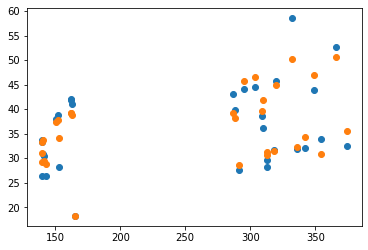

In [97]:
plt.scatter(np.array(X_test)[:,0], np.array(y_test))
plt.scatter(np.array(X_test)[:,0], np.array(y_pred));

Great improvements from before

---

## **D. Finalize Model**

### **a. Creating pipeline and Re-Train/Fit Model on All Data**

**NOTE: If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model).**

In [98]:
from sklearn.pipeline import Pipeline

In [99]:
scaler = StandardScaler()

svr_final = SVR(C= 5, degree= 2, epsilon= 2, gamma= 'scale', kernel= 'linear')
operations = [('scaler', scaler),
              ('svr_final', svr_final)]

In [100]:
final_model_pipe = Pipeline(operations)

In [101]:
final_model_pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr_final',
                 SVR(C=5, cache_size=200, coef0=0.0, degree=2, epsilon=2,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

---

### **b. Saving the Model**

In [102]:
from joblib import dump

In [103]:
dump(final_model_pipe, '/content/drive/MyDrive/Data_Science/Materi/Notes/10_Support_Vector_Machines/concrete_strength_prediction_svr_pipeline.joblib')

['/content/drive/MyDrive/Data_Science/Materi/Notes/10_Support_Vector_Machines/concrete_strength_prediction_svr_pipeline.joblib']

---
---